In [1]:
import json
import itertools
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from yt_dlp import YoutubeDL

np.random.seed(2024)

In [2]:
YOUTUBE_SEARCH_RESULTS: Dict = json.load(open("data/youtube_search_results.json"))

CATEGORIES = list(YOUTUBE_SEARCH_RESULTS.keys())
print("\n".join(CATEGORIES))

COMBINED_SEARCH_RESULTS = list(
    itertools.chain.from_iterable(
        [search_results for search_results in YOUTUBE_SEARCH_RESULTS.values()]
    )
)

print("-" * 10)
print(f"Total search results: {len(COMBINED_SEARCH_RESULTS)}")

Food
Travel
Entertainment
Gaming
Lifestyle
Education
Sports
Technology
Pets & Animals
Health & Wellness
----------
Total search results: 7943


In [3]:
def generate_left_skewed_values(min_val, max_val, alpha, beta, num_samples):
    values = []
    scale = max_val - min_val
    while len(values) < num_samples:
        # Generate a value from a beta distribution
        sample = np.random.beta(alpha, beta)
        # Scale and shift the value to the desired range
        sample = int(min_val + sample * scale)
        # Append if within the desired range (additional check)
        if min_val <= sample <= max_val:
            values.append(sample)
    return values


# Parameters
min_val = 5
max_val = 300
alpha = 1.5  # Controls the shape of the beta distribution
beta = 10  # A larger beta compared to alpha increases left skewness
num_samples = 65000  # Number of values you want to generate

# Generate the values
random_durations = generate_left_skewed_values(
    min_val, max_val, alpha, beta, num_samples
)

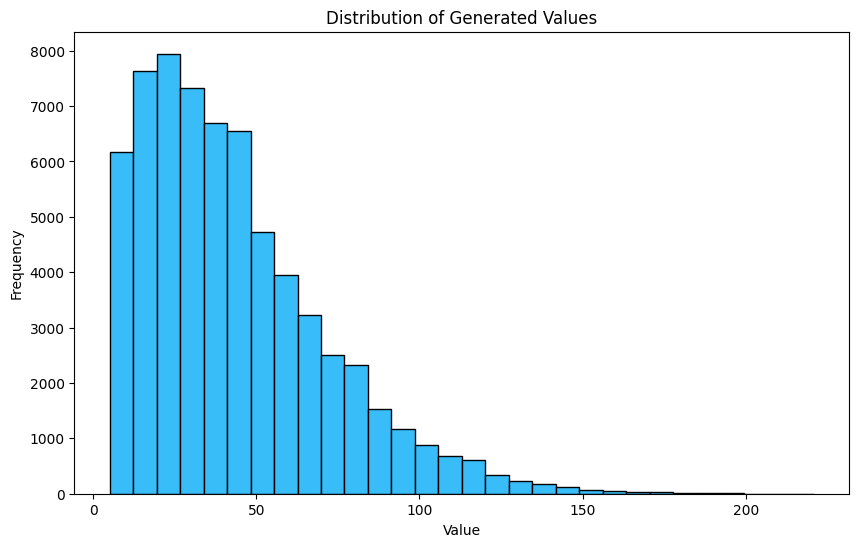

In [4]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(random_durations, bins=30, color="#38bdf8", edgecolor="black")
plt.title("Distribution of Generated Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [19]:
with open("data/random_durations.json", "w") as f:
    json.dump(random_durations, f, indent=2)

In [20]:
def process_single_video(video_id: str) -> Dict:
    with YoutubeDL(params={"format": "best[ext=mp4]", "quiet": True}) as ydl:
        ydl.download(f"https://www.youtube.com/watch?v={video_id}")
        return True

In [21]:
process_single_video(COMBINED_SEARCH_RESULTS[0])

{'id': 'w2CHbo08N9E',
 'title': 'Cách nấu Xôi Đậu Xanh bằng Nồi Cơm Điện siêu nhanh ngon hơn xôi vò',
 'formats': [{'format_id': 'sb3',
   'format_note': 'storyboard',
   'ext': 'mhtml',
   'protocol': 'mhtml',
   'acodec': 'none',
   'vcodec': 'none',
   'url': 'https://i.ytimg.com/sb/w2CHbo08N9E/storyboard3_L0/default.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgjftKypBg==&sigh=rs$AOn4CLDaihaWhAv-EwoO1qmzp9XYarKldw',
   'width': 48,
   'height': 27,
   'fps': 0.19305019305019305,
   'rows': 10,
   'columns': 10,
   'fragments': [{'url': 'https://i.ytimg.com/sb/w2CHbo08N9E/storyboard3_L0/default.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgjftKypBg==&sigh=rs$AOn4CLDaihaWhAv-EwoO1qmzp9XYarKldw',
     'duration': 518.0}],
   'resolution': '48x27',
   'aspect_ratio': 1.78,
   'filesize_approx': None,
   'http_headers': {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.115 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,